## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
(df[df['converted']==1].shape[0]/df.shape[0])*100

11.96591935560551

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.query ('group == "treatment" and landing_page != "new_page"').count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

In [7]:
df.query ('group == "control" and landing_page != "old_page"').count()

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

f. Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# treatment and new_page into one dataframe
df2_treatment = df.query('group == "treatment" and landing_page == "new_page"')


In [10]:
# control and old_page into one dataframe
df2_control = df.query('group == "control" and landing_page == "old_page"')

In [11]:
df2=df2_treatment.merge(df2_control,how='outer')
df2.head()

user_id                   timestamp      group landing_page  converted
0   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
1   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
2   679687  2017-01-19 03:26:46.940749  treatment     new_page          1
3   817355  2017-01-04 17:58:08.979471  treatment     new_page          1
4   839785  2017-01-15 18:11:06.610965  treatment     new_page          1

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
sum(df2.user_id.duplicated())

1

c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2.duplicated(['user_id'], keep=False)]

user_id                   timestamp      group landing_page  converted
938    773192  2017-01-09 05:37:58.781806  treatment     new_page          0
1404   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2 = df2[~df2.user_id.duplicated(keep='first')]

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
df2_control.converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
df2_treatment.converted.mean()

0.11880724790277405

d. What is the probability that an individual received the new page?

In [20]:
len(df2_treatment)/len(df2)

0.5000653855683727

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

The treatment group had a conversion rate of 11.88% and individuals in the control group had a conversion rate of 12.04%. Hence until now treatment group does not lead to more conversions than the control group, but this can be simply due to random chance.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

Null Hypotheses: $p_{old}$ >= $p_{new}$

Alternative Hypothesis: $p_{old}$ < $p_{new}$

<b>OR</b> , in other words


Null Hypotheses: $p_{old}$ - $p_{new}$>=0

Alternative Hypothesis: $p_{old}$ - $p_{new}$ < 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
len(df2.query('converted == 1'))/len(df2)

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
len(df2.query('converted == 0'))/len(df2)

0.8804029127550037

c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
len(df2_treatment)

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
len(df2_control)

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.choice([1, 0], size=len(df2_treatment), p=[df2.converted.mean(), (1-(df2.converted.mean()))])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.choice([1, 0], size=len(df2_control), p=[df2.converted.mean(), (1-(df2.converted.mean()))])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
#𝑝𝑛𝑒𝑤  - 𝑝𝑜𝑙𝑑
new_page_converted.mean() - old_page_converted.mean()


-0.002288021337389104

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
# Create a sampling distribution of the difference in proportions
p_diffs = []
for _ in range(10000):
     new_page_converted = np.random.choice([1, 0], size=len(df2_treatment), p=[df2.converted.mean(), (1-(df2.converted.mean()))])
     old_page_converted = np.random.choice([1, 0], size=len(df2_control), p=[df2.converted.mean(), (1-(df2.converted.mean()))])
     p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

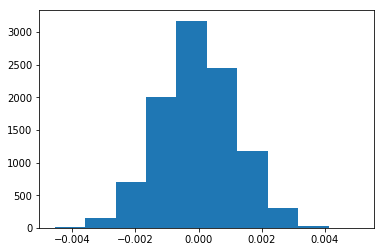

In [29]:
# Convert to numpy array
p_diffs = np.array(p_diffs)

# Plot sampling distribution
plt.hist(p_diffs);

In [30]:
ab_diff=df2_treatment.converted.mean() - df2_control.converted.mean()
ab_diff

-0.0015790565976871451

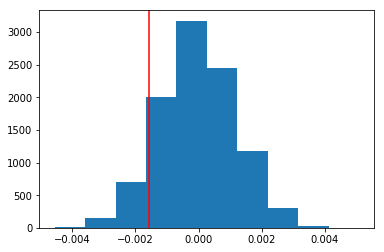

In [31]:
# Plot observed statistic with the null distibution
plt.hist(p_diffs);
plt.axvline(ab_diff.mean(), c='red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
# compute p-value
(p_diffs > ab_diff).mean()

0.90039999999999998

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.** 

The value calculated in **j.** is called p-value.
P-value, the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

We had, 
Null Hypotheses: $p_{old}$ >= $p_{new}$ 

Alternative Hypothesis: $p_{old}$ < $p_{new}$

The null hypothesis was that the difference in means would be equal or less than 0, and the alternative was the difference would be greater than 0

The difference seems less than zero(ab_diff=-0.001579) and p_value is 0.9061.

p-value <= alpha --> reject null hypothesis

p-value > alpha --> fail to reject null hypothesis

Since 0.9061 >0.05 we fail to reject null hypothesis and the old page seems better.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:

import statsmodels.api as sm

convert_old = len(df2_control[df2_control['converted'] == 1])
convert_new = len(df2_treatment[df2_treatment['converted'] == 1])
n_old = len(df2_control)
n_new = len(df2_treatment)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [34]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],alternative='smaller')
z_score, p_value

(1.3116075339133115, 0.90517370514059103)

In [37]:
#how significant our z_score is
from scipy.stats import norm
norm.cdf(z_score) 

0.90517370514059103

In [36]:
# for our single-sides test, assumed at 95% confidence level, 
# we calculate critical value of 95% confidence 
from scipy.stats import norm
print(norm.ppf(1-(0.05)))

1.64485362695


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

P-value:

As explained above 0.9061(p-value) > 0.05(alpha) we fail to reject null hypothesis and the old page seems better.

Z-score:

Reference : https://www.statisticshowto.com/probability-and-statistics/z-score/

A z-score (also called a standard score) gives you an idea of how far from the mean a data point is.

We can say that z-score of 1.31 is less than the critical value of 95% confidence level i.e 1.644

Hence, we fail to reject the null hypothesis.



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

There seems only one explanatory variable and hence  simple linear regression can be used.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [38]:
df2['intercept']=1
df2['ab_page']=0
df2.head()

user_id                   timestamp      group landing_page  converted  \
0   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
1   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
2   679687  2017-01-19 03:26:46.940749  treatment     new_page          1   
3   817355  2017-01-04 17:58:08.979471  treatment     new_page          1   
4   839785  2017-01-15 18:11:06.610965  treatment     new_page          1   

   intercept  ab_page  
0          1        0  
1          1        0  
2          1        0  
3          1        0  
4          1        0

In [39]:
ab_page_ind = df2[df2['group']=='treatment'].index
df2.loc[ab_page_ind, "ab_page"] = 1
df2.head()

user_id                   timestamp      group landing_page  converted  \
0   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
1   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
2   679687  2017-01-19 03:26:46.940749  treatment     new_page          1   
3   817355  2017-01-04 17:58:08.979471  treatment     new_page          1   
4   839785  2017-01-15 18:11:06.610965  treatment     new_page          1   

   intercept  ab_page  
0          1        1  
1          1        1  
2          1        1  
3          1        1  
4          1        1

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [45]:
results=sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]).fit() 


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [47]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-02-03 17:03 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value with ab_page seems 0.189.

In,

Part II:
It was a one tail test as, 

H0: p_new > p_old; 
H1: p_new <= p_old


Part III:

Here we have used logistic regression model to determine the p-value.
It was a two tail test here as,

H0:p_new = p_old
h1:p_new != p_old



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Adding other things or factors is always a good idea or atleast after adding them output can be tested. If we have certain promotions running then user activity count of old page and new page can be intresting to check.

Disadvantages can be it can add complexity in real world , avoiding co-related columns can also be a good idea.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [48]:
df = pd.read_csv('countries.csv')
df.head()

user_id country
0   834778      UK
1   928468      US
2   822059      UK
3   711597      UK
4   710616      UK

In [49]:
df['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [50]:
dummies = pd.get_dummies(df['country'])
df_new = df.join(dummies)

In [51]:
df_new.head()

user_id country  CA  UK  US
0   834778      UK   0   1   0
1   928468      US   0   0   1
2   822059      UK   0   1   0
3   711597      UK   0   1   0
4   710616      UK   0   1   0

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [52]:
df_new['intercept']=1

df_new.reset_index(drop=True)
df_new.set_index('user_id')
df_new.head()

user_id country  CA  UK  US  intercept
0   834778      UK   0   1   0          1
1   928468      US   0   0   1          1
2   822059      UK   0   1   0          1
3   711597      UK   0   1   0          1
4   710616      UK   0   1   0          1

In [53]:
df_new.columns,df2.columns

(Index(['user_id', 'country', 'CA', 'UK', 'US', 'intercept'], dtype='object'),
 Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted',
        'intercept', 'ab_page'],
       dtype='object'))

In [54]:
df2.reset_index(drop=True)
df2.set_index('user_id')

#Using suffix to avoid error due to same column name
df_final = df2.join(df_new, lsuffix='_left', rsuffix='_right')
df_final.head()

user_id_left                   timestamp      group landing_page  \
0        661590  2017-01-11 16:55:06.154213  treatment     new_page   
1        853541  2017-01-08 18:28:03.143765  treatment     new_page   
2        679687  2017-01-19 03:26:46.940749  treatment     new_page   
3        817355  2017-01-04 17:58:08.979471  treatment     new_page   
4        839785  2017-01-15 18:11:06.610965  treatment     new_page   

   converted  intercept_left  ab_page  user_id_right country   CA   UK   US  \
0          0               1        1       834778.0      UK  0.0  1.0  0.0   
1          0               1        1       928468.0      US  0.0  0.0  1.0   
2          1               1        1       822059.0      UK  0.0  1.0  0.0   
3          1               1        1       711597.0      UK  0.0  1.0  0.0   
4          1               1        1       710616.0      UK  0.0  1.0  0.0   

   intercept_right  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0

In [55]:
#Dropping Null value columns 
df_final.dropna(inplace=True)

In [56]:
#Training model
lm = sm.OLS(df_final['converted'], df_final[['intercept_left', 'ab_page','CA', 'US']])
results = lm.fit()

#Model summary 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.445
Date:                Wed, 03 Feb 2021   Prob (F-statistic):              0.227
Time:                        17:07:59   Log-Likelihood:                -85266.
No. Observations:              290583   AIC:                         1.705e+05
Df Residuals:                  290579   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept_left     0.1212      0.001     89.914      0.000       0.119       0.124
ab_page           -0.0016      0.001     -1.315      0.189      -0.004       0.001
CA                -0.0048      0.003     -1.617      0.106      -0.011       0.001
US                -0.0007      0.001     -0.533      0.594      -0.003       0.002
==============================================================================
Omnibus:                   125550.700   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414295.399
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         6.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The null hypothesis was that the difference in means would be equal or less than 0, and the alternative was the difference would be greater than 0.

The p-value is 0.189 which is large hence we fail to reject the null hypothesis.

In [57]:
#Adding new columns for interaction between page and country to see if there significant effects on conversion

df_final['US_ab_page'] = df_final['US'] * df_final['ab_page']
df_final['CA_ab_page'] = df_final['CA'] * df_final['ab_page']
df_final.head()

user_id_left                   timestamp      group landing_page  \
0        661590  2017-01-11 16:55:06.154213  treatment     new_page   
1        853541  2017-01-08 18:28:03.143765  treatment     new_page   
2        679687  2017-01-19 03:26:46.940749  treatment     new_page   
3        817355  2017-01-04 17:58:08.979471  treatment     new_page   
4        839785  2017-01-15 18:11:06.610965  treatment     new_page   

   converted  intercept_left  ab_page  user_id_right country   CA   UK   US  \
0          0               1        1       834778.0      UK  0.0  1.0  0.0   
1          0               1        1       928468.0      US  0.0  0.0  1.0   
2          1               1        1       822059.0      UK  0.0  1.0  0.0   
3          1               1        1       711597.0      UK  0.0  1.0  0.0   
4          1               1        1       710616.0      UK  0.0  1.0  0.0   

   intercept_right  US_ab_page  CA_ab_page  
0              1.0         0.0         0.0  
1              1.0         1.0         0.0  
2              1.0         0.0         0.0  
3              1.0         0.0         0.0  
4              1.0         0.0         0.0

In [58]:
#Training model
lm = sm.OLS(df_final['converted'], df_final[['intercept_left','CA_ab_page','US_ab_page','US','CA']])
results = lm.fit()

#Model summary 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.903
Date:                Wed, 03 Feb 2021   Prob (F-statistic):              0.107
Time:                        17:08:01   Log-Likelihood:                -85265.
No. Observations:              290583   AIC:                         1.705e+05
Df Residuals:                  290578   BIC:                         1.706e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept_left     0.1204      0.001     99.850      0.000       0.118       0.123
CA_ab_page        -0.0108      0.005     -2.012      0.044      -0.021      -0.000
US_ab_page        -0.0014      0.001     -0.978      0.328      -0.004       0.001
US             -4.495e-05      0.002     -0.028      0.977      -0.003       0.003
CA                 0.0006      0.004      0.153      0.879      -0.007       0.008
==============================================================================
Omnibus:                   125548.305   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414278.942
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
df2_treatment = df_final.query('group == "treatment" and landing_page == "new_page"')
# control and old_page into one dataframe
df2_control = df_final.query('group == "control" and landing_page == "old_page"')

ab_diff=df2_treatment.converted.mean() - df2_control.converted.mean()
ab_diff

-0.0015790676755078892

Here p-value for CA and US comes out to be 0.044 and 0.328 respectively  and difference in means is less than 0, The null hypothesis was that the difference in means would be equal or less than 0, and the alternative was the difference would be greater than 0.

The difference seems less than zero, and the p-value is large.Hence we cannot reject the null hypothesis and the old page seems better.There are no significant effects on conversion due to specific country , hence again  we fail to reject null hypothesis.


<a id='conclusions'></a>
## Conclusion


We have performed various statisical test above and all of them  proved that null hypothesis cannot be reject(null hypothesis being old page is better). Hence it would be company's interest to retain its old page as new page is not helping to bring new customers much.


In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0